Pude usar los mismos gráficos del anterior ejercicio de Dash pero quiero probar.

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
# Cargar los datos
df = pd.read_csv('Advertising.csv', index_col=0)

In [3]:
# Crear figura
fig = go.Figure()

In [4]:
# Definir colores personalizados
colors = {
    'TV': '#3498db',
    'Radio': '#e74c3c',
    'Newspaper': '#2ecc71'
}

In [12]:
# Agregar trazos para cada canal publicitario
for channel in ['TV', 'Radio', 'Newspaper']:
    fig.add_trace(
        go.Scatter(
            x=df[channel],
            y=df['Sales'],
            mode='markers',
            name=channel,
            marker=dict(
                size=10,
                color=colors[channel],
                opacity=0.6,
                line=dict(
                    color='white',
                    width=0.5
                )
            ),
            hovertemplate=
            f'<b>{channel}</b><br>' +
            'Inversión: $%{x:.1f}K<br>' +
            'Ventas: $%{y:.1f}K<br>' +
            '<extra></extra>'
        )
    )

In [13]:
# Agregar anotaciones con correlaciones
for i, channel in enumerate(['TV', 'Radio', 'Newspaper']):
    correlation = df[channel].corr(df['Sales']).round(3)
    fig.add_annotation(
        x=0.01,
        y=0.15 - (i * 0.05),
        xref="paper",
        yref="paper",
        text=f"Correlación {channel}-Ventas: {correlation}",
        showarrow=False,
        font=dict(
            size=12,
            color=colors[channel]
        ),
        bgcolor='rgba(255, 255, 255, 0.8)'
    )

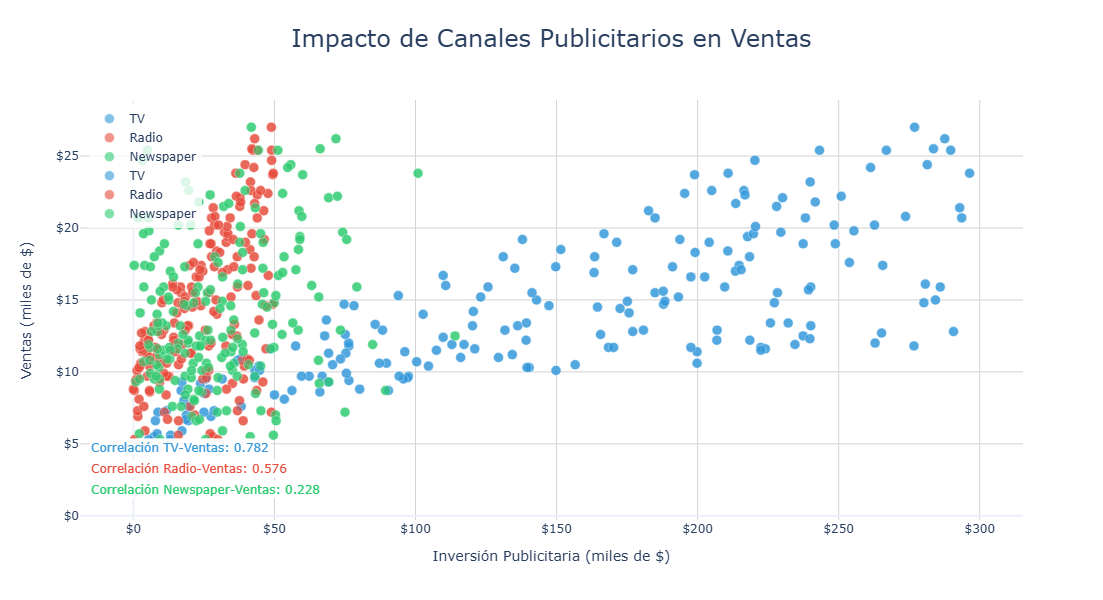

In [14]:
# Mostrar el gráfico
fig.show()

In [9]:
# Imprimir estadísticas adicionales
stats_df = pd.DataFrame({
    'Canal': ['TV', 'Radio', 'Newspaper'],
    'Inversión Promedio': [df[canal].mean() for canal in ['TV', 'Radio', 'Newspaper']],
    'Inversión Máxima': [df[canal].max() for canal in ['TV', 'Radio', 'Newspaper']],
    'Inversión Mínima': [df[canal].min() for canal in ['TV', 'Radio', 'Newspaper']]
}).round(2)


In [11]:
print("\nEstadísticas por Canal Publicitario:")
print(stats_df.to_string(index=False))


Estadísticas por Canal Publicitario:
    Canal  Inversión Promedio  Inversión Máxima  Inversión Mínima
       TV              147.04             296.4               0.7
    Radio               23.26              49.6               0.0
Newspaper               30.55             114.0               0.3
